<a href="https://colab.research.google.com/github/jumanajouhar/Basic-Python-for-Machine-Learning/blob/main/imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/my-drive/')

Drive already mounted at /content/my-drive/; to attempt to forcibly remount, call drive.mount("/content/my-drive/", force_remount=True).


In [ ]:
path = '/content/my-drive/MyDrive/Train_Data'
classes = os.listdir(path)
classes

['cat', 'dog']

In [ ]:
base_dir = '/content/my-drive/MyDrive/Train_Data'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)

Found 1399 files belonging to 2 classes.
Using 1260 files for training.
Found 1399 files belonging to 2 classes.
Using 139 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 23, 23, 64)      

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history = model.fit(train_datagen,
          epochs=11,
          validation_data=test_datagen)

Epoch 1/11
40/40 [==============================] - 71s 2s/step - loss: 0.6306 - accuracy: 0.6659 - val_loss: 5.2725 - val_accuracy: 0.5108
Epoch 2/11
40/40 [==============================] - 71s 2s/step - loss: 0.5885 - accuracy: 0.6952 - val_loss: 1.3299 - val_accuracy: 0.5324
Epoch 3/11
40/40 [==============================] - 68s 2s/step - loss: 0.5831 - accuracy: 0.7063 - val_loss: 0.7233 - val_accuracy: 0.6043
Epoch 4/11
40/40 [==============================] - 69s 2s/step - loss: 0.4996 - accuracy: 0.7595 - val_loss: 1.3050 - val_accuracy: 0.5468
Epoch 5/11
40/40 [==============================] - 68s 2s/step - loss: 0.4711 - accuracy: 0.7833 - val_loss: 1.3117 - val_accuracy: 0.5396
Epoch 6/11
40/40 [==============================] - 68s 2s/step - loss: 0.3932 - accuracy: 0.8238 - val_loss: 0.9983 - val_accuracy: 0.6187
Epoch 7/11
40/40 [==============================] - 68s 2s/step - loss: 0.3609 - accuracy: 0.8508 - val_loss: 0.8404 - val_accuracy: 0.6403
Epoch 8/11
40/40 [==

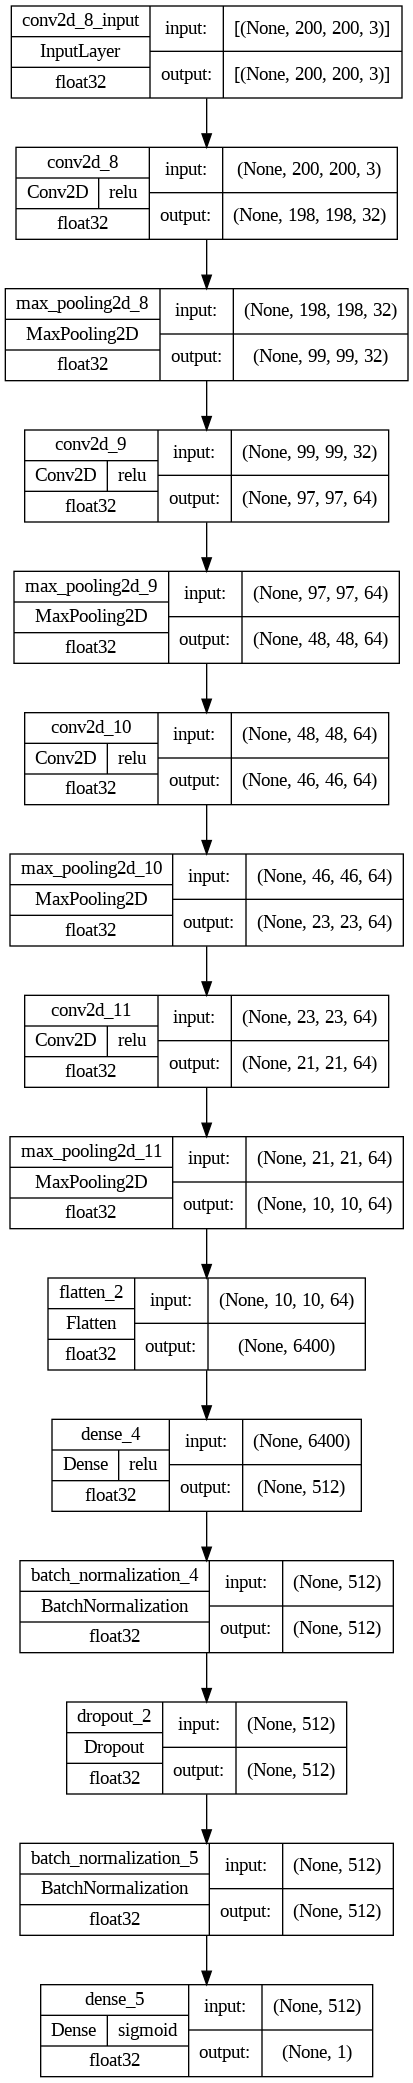

In [ ]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

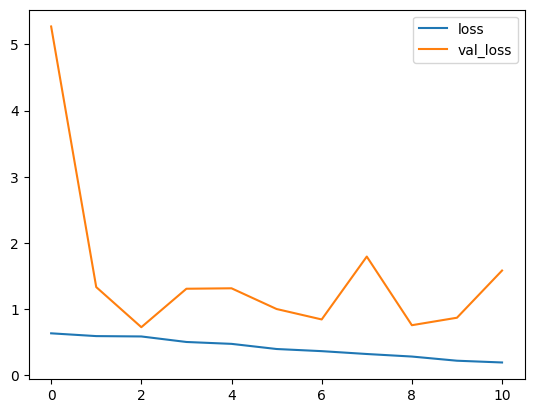

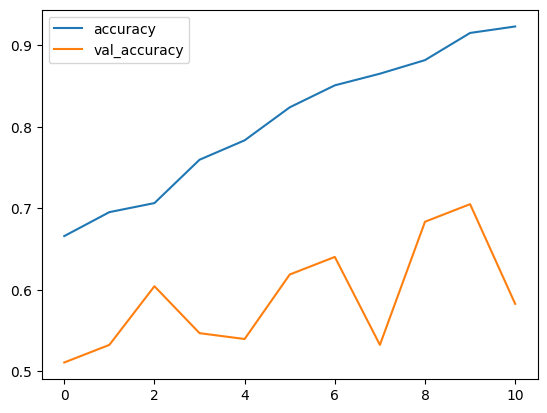

1/1 [==============================] - 0s 32ms/step
[[0.00342047]]
Cat


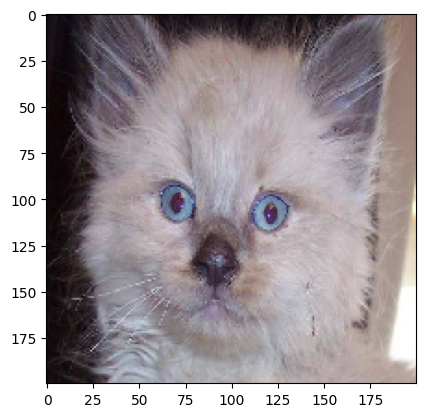

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()
from keras.preprocessing import image


#Input image
test_image = tf.keras.utils.load_img('/content/my-drive/MyDrive/Train_Data/cat/cat.488.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)
print(result)
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 [==============================] - 0s 30ms/step
[[0.78535473]]
Dog


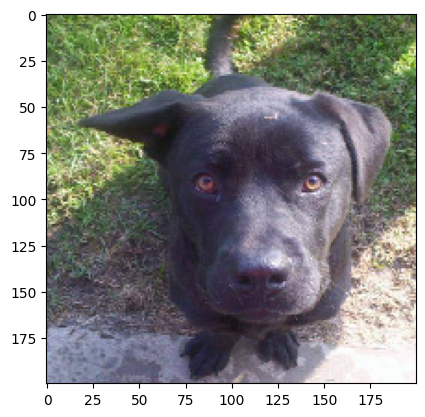

In [ ]:
#Input image
test_image = tf.keras.utils.load_img('/content/my-drive/MyDrive/Train_Data/dog/dog.8.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)
print(result)
#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")